<a href="https://colab.research.google.com/github/joshuahurd515/ai-and-data-science-work/blob/main/binomialDistr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

In [ ]:
die_roll = np.random.randint(1, 7)
assert 1 <= die_roll <= 6

In [ ]:
np.random.seed(0)
die_rolls = [np.random.randint(1, 7) for _ in range(3)]
assert die_rolls == [5, 6, 1]

In [ ]:
np.random.seed(0)
coin_flip = np.random.randint(0, 2)
print(f"Coin landed on {'heads' if coin_flip == 1 else 'tails'}")

Coin landed on tails


In [ ]:
np.random.seed(0)
def frequency_heads(coin_flip_sequence):
 total_heads = len([head for head in coin_flip_sequence if head == 1])
 return total_heads / len(coin_flip_sequence)
coin_flips = [np.random.randint(0, 2) for _ in range(10)]
freq_heads = frequency_heads(coin_flips)
print(f"Frequency of Heads is {freq_heads}")

Frequency of Heads is 0.8


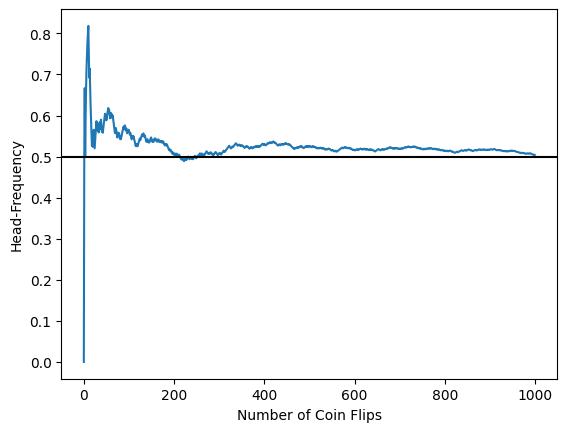

In [ ]:
np.random.seed(0)
coin_flips = []
frequencies = []
for _ in range(1000):
 coin_flips.append(np.random.randint(0, 2))
 frequencies.append(frequency_heads(coin_flips))
plt.plot(list(range(1000)), frequencies)
plt.axhline(0.5, color='k')
plt.xlabel('Number of Coin Flips')
plt.ylabel('Head-Frequency')
plt.show()

In [ ]:
np.random.seed(0)
print("Let's flip the biased coin once.")
coin_flip = np.random.binomial(1, 0.7)
print(f"Biased coin landed on {'heads' if coin_flip == 1 else 'tails'}.")
print("\nLet's flip the biased coin 10 times.")
number_coin_flips = 10
head_count = np.random.binomial(number_coin_flips, .7)
print((f"{head_count} heads were observed out of "
 f"{number_coin_flips} biased coin flips"))

Let's flip the biased coin once.
Biased coin landed on heads.

Let's flip the biased coin 10 times.
6 heads were observed out of 10 biased coin flips


In [ ]:
np.random.seed(0)
head_count = np.random.binomial(1000, 0.7)
frequency = head_count / 1000
print(f"Frequency of Heads is {frequency}")

Frequency of Heads is 0.697


In [ ]:
np.random.seed(0)
assert np.random.binomial(1000, 0.7) / 1000 == 0.697
for i in range(1, 6):
 head_count = np.random.binomial(1000, 0.7)
 frequency = head_count / 1000
 print(f"Frequency at iteration {i} is {frequency}")
 if frequency == 0.7:
  print("Frequency equals the probability!\n")

Frequency at iteration 1 is 0.69
Frequency at iteration 2 is 0.7
Frequency equals the probability!

Frequency at iteration 3 is 0.707
Frequency at iteration 4 is 0.702
Frequency at iteration 5 is 0.699


In [ ]:
np.random.seed(0)
head_count_list = [np.random.binomial(1000, 0.7) for _ in range(500)]

np.random.seed(0)
head_count_array = np.random.binomial(1000, 0.7, 500)

assert head_count_array.tolist() == head_count_list

In [ ]:
new_array = np.array(head_count_list)
assert np.array_equal(new_array, head_count_array) == True


In [ ]:
frequency_array = head_count_array / 1000
assert frequency_array.tolist() == [head_count / 1000
 for head_count in head_count_list]
assert frequency_array.tolist() == list(map(lambda x: x / 1000,
 head_count_list))

In [ ]:
print(frequency_array[:20])

[0.697 0.69  0.7   0.707 0.702 0.699 0.723 0.67  0.702 0.713 0.721 0.689
 0.711 0.697 0.717 0.691 0.731 0.697 0.722 0.728]


In [ ]:
min_freq = frequency_array.min()
max_freq = frequency_array.max()
print(f"Minimum frequency observed: {min_freq}")
print(f"Maximum frequency observed: {max_freq}")
print(f"Difference across frequency range: {max_freq - min_freq}")

Minimum frequency observed: 0.656
Maximum frequency observed: 0.733
Difference across frequency range: 0.07699999999999996


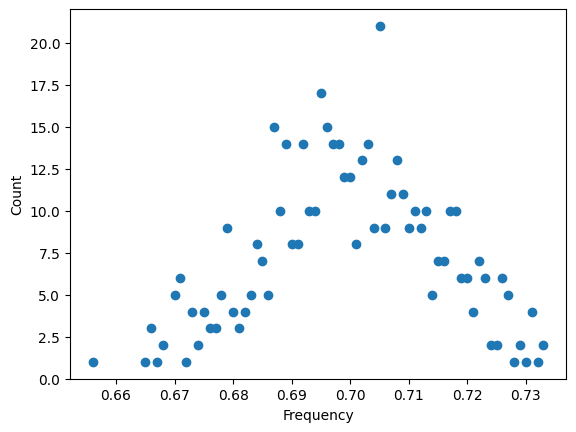

In [ ]:
frequency_counts = defaultdict(int)
for frequency in frequency_array:
 frequency_counts[frequency] += 1
frequencies = list(frequency_counts.keys())
counts = [frequency_counts[freq] for freq in frequencies]

plt.scatter(frequencies, counts)
plt.xlabel('Frequency')
plt.ylabel('Count')
plt.show()

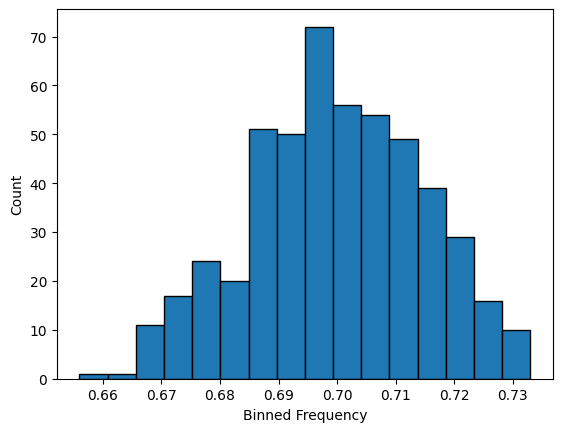

In [ ]:
plt.hist(frequency_array, bins='auto', edgecolor='black')
plt.xlabel('Binned Frequency')
plt.ylabel('Count')
plt.show()

Number of Bins: 16


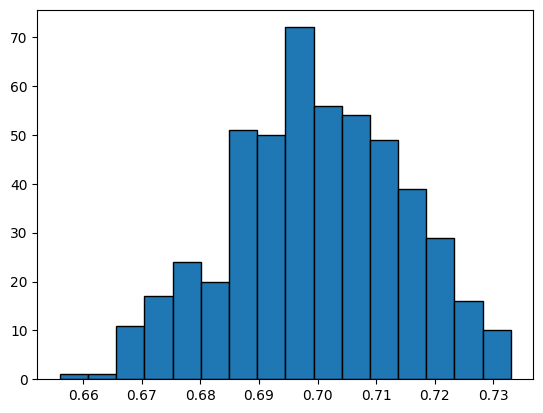

In [ ]:
counts, _, _ = plt.hist(frequency_array, bins='auto',
 edgecolor='black')
print(f"Number of Bins: {counts.size}")

Bin width: 0.004812499999999997


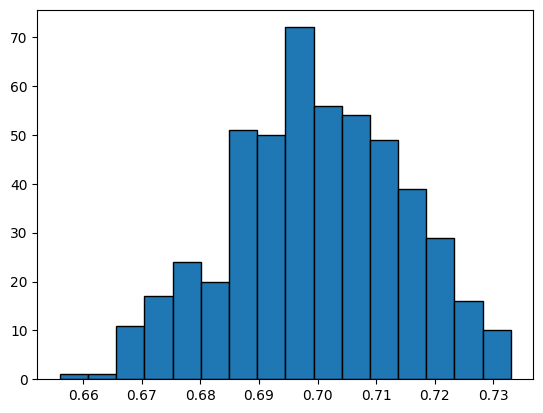

In [ ]:
counts, bin_edges, _ = plt.hist(frequency_array, bins='auto',
 edgecolor='black')
bin_width = bin_edges[1] - bin_edges[0]
assert bin_width == (max_freq - min_freq) / counts.size
print(f"Bin width: {bin_width}")

In [ ]:
def output_bin_coverage(i):
 count = int(counts[i])
 range_start, range_end = bin_edges[i], bin_edges[i+1]
 range_string = f"{range_start} - {range_end}"
 print((f"The bin for frequency range {range_string} contains "
 f"{count} element{'' if count == 1 else 's'}"))
output_bin_coverage(0)
output_bin_coverage(5)

The bin for frequency range 0.656 - 0.6608125 contains 1 element
The bin for frequency range 0.6800625 - 0.684875 contains 20 elements


In [ ]:
assert counts[counts.argmax()] == counts.max()
output_bin_coverage(counts.argmax())


The bin for frequency range 0.6945 - 0.6993125 contains 72 elements


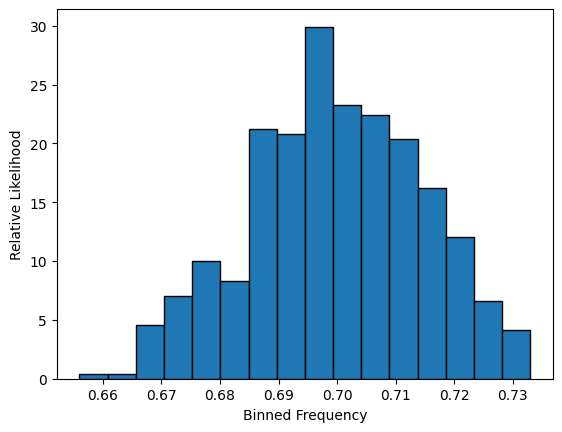

In [ ]:
likelihoods, bin_edges, _ = plt.hist(frequency_array, bins='auto',
 edgecolor='black', density=True)
plt.xlabel('Binned Frequency')
plt.ylabel('Relative Likelihood')
plt.show()

In [ ]:
assert likelihoods.sum() * bin_width == 1.0


In [ ]:
index = likelihoods.argmax()
area = likelihoods[index] * bin_width
range_start, range_end = bin_edges[index], bin_edges[index+1]
range_string = f"{range_start} - {range_end}"
print(f"Sampled frequency falls within interval {range_string} with probability {area}")

Sampled frequency falls within interval 0.6945 - 0.6993125 with probability 0.144


In [ ]:
peak_index = likelihoods.argmax()
start_index, end_index = (peak_index - 1, peak_index + 2)
area = likelihoods[start_index: end_index + 1].sum() * bin_width
range_start, range_end = bin_edges[start_index], bin_edges[end_index]
range_string = f"{range_start} - {range_end}"
print(f"Sampled frequency falls within interval {range_string} with probability {area}")

Sampled frequency falls within interval 0.6896875 - 0.704125 with probability 0.464


In [ ]:
def compute_high_confidence_interval(likelihoods, bin_width):
 peak_index = likelihoods.argmax()
 area = likelihoods[peak_index] * bin_width
 start_index, end_index = peak_index, peak_index + 1
 while area < 0.95:
  if start_index > 0:
    start_index -= 1
  if end_index < likelihoods.size - 1:
    end_index += 1
  area = likelihoods[start_index: end_index + 1].sum() * bin_width
 range_start, range_end = bin_edges[start_index], bin_edges[end_index]
 range_string = f"{range_start:.6f} - {range_end:.6f}"
 print((f"The frequency range {range_string} represents a "
 f"{100 * area:.2f}% confidence interval"))
 return start_index, end_index
compute_high_confidence_interval(likelihoods, bin_width)

The frequency range 0.670438 - 0.723375 represents a 95.40% confidence interval


(3, 14)

In [ ]:
np.random.seed(0)
head_count_array = np.random.binomial(1000, 0.7, 100000)
frequency_array = head_count_array / 1000
assert frequency_array.size == 100000

The frequency range 0.670429 - 0.727857 represents a 95.42% confidence interval


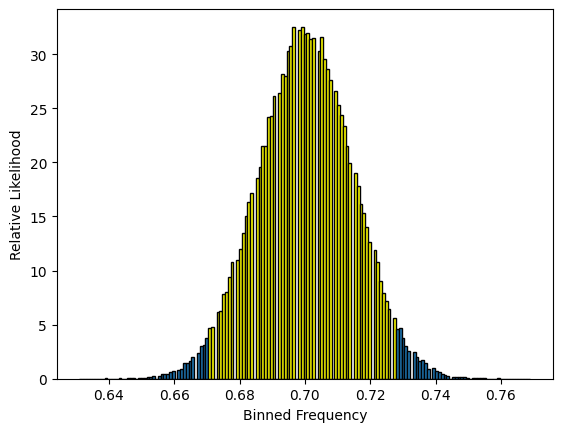

In [ ]:
likelihoods, bin_edges, patches = plt.hist(frequency_array, bins='auto',
 edgecolor='black', density=True)
bin_width = bin_edges[1] - bin_edges[0]
start_index, end_index = compute_high_confidence_interval(likelihoods,
 bin_width)
for i in range(start_index, end_index):
 patches[i].set_facecolor('yellow')
plt.xlabel('Binned Frequency')
plt.ylabel('Relative Likelihood')
plt.show()

The frequency range 0.695769 - 0.703708 represents a 95.06% confidence interval


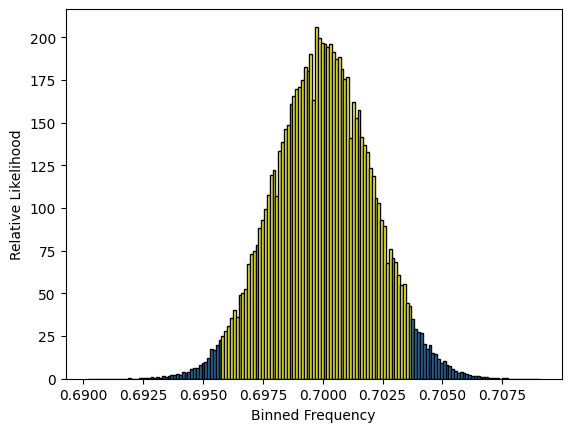

In [ ]:
np.random.seed(0)
head_count_array = np.random.binomial(50000, 0.7, 100000)
frequency_array = head_count_array / 50000
likelihoods, bin_edges, patches = plt.hist(frequency_array, bins='auto',
 edgecolor='black', density=True)
bin_width = bin_edges[1] - bin_edges[0]
start_index, end_index = compute_high_confidence_interval(likelihoods,
 bin_width)
for i in range(start_index, end_index):
 patches[i].set_facecolor('yellow')
plt.xlabel('Binned Frequency')
plt.ylabel('Relative Likelihood')
plt.show()

In [ ]:
np.random.seed(0)
likelihoods, bin_edges = np.histogram(frequency_array, bins='auto',
 density=True)
bin_width = bin_edges[1] - bin_edges[0]
compute_high_confidence_interval(likelihoods, bin_width)

The frequency range 0.695769 - 0.703708 represents a 95.06% confidence interval


(47, 114)

In [ ]:
np.random.seed(0)
total_cards = 52
red_card_count = np.random.randint(0, total_cards + 1)

In [ ]:
black_card_count = total_cards - red_card_count
assert black_card_count != red_card_count

In [ ]:
def compute_event_probability(event_condition, sample_space):

    event_outcomes = [outcome for outcome in sample_space if event_condition(outcome)]
    event_probability = sum(sample_space[outcome] for outcome in event_outcomes)
    return event_probability

weighted_sample_space = {'red_card': red_card_count,
 'black_card': black_card_count}
prob_red = compute_event_probability(lambda x: x == 'red_card',
 weighted_sample_space)


**Summary**


The np.random.binomial method is used to simulate random coin flips, deriving its name from the binomial distribution, which encapsulates coin-flip probabilities. As coins are flipped repeatedly, the frequency of heads tends to converge towards the actual probability of heads, although the final frequency may slightly deviate from this probability. To visualize the variability in recorded coin-flip frequencies, histograms can be employed, displaying binned counts of observed numeric values. These counts can be transformed into relative likelihoods, ensuring the area beneath the histogram sums to 1.0, effectively creating a probability distribution. The confidence interval, represented by the area around the distribution's peak, indicates the likelihood of an unknown probability falling within a certain frequency range, typically preferred at 95% confidence or higher. When the number of sampled frequencies is substantial, the shape of the frequency histogram resembles a bell-shaped curve, known as the Gaussian or normal distribution. According to the central limit theorem, the 95% confidence interval associated with this curve narrows as the size of each frequency sample increases. Additionally, np.random.permutation facilitates the simulation of card shuffles by returning a random permutation of the inputted deck of cards, representing a random ordering of card elements. While iterating over all permutations for a 52-card deck is computationally infeasible, capturing permutations of a smaller 10-card deck is manageable and can be used to compute the sample space for the smaller deck.